In [13]:

try:
    import sys
    sys.path.append('/Volumes/SOURCE/Functions')
    sys.path.append('/Volumes/SOURCE')
    from Functions import backtest
    from Functions import picky
    print('Imported from USB')
    
except ModuleNotFoundError:
    sys.path.append('/Users/chakbong/Desktop')
    sys.path.append('/Users/chakbong/Desktop/Functions')
    from Functions import backtest
    from Functions import picky
    print('Imported from desktop')

Imported from USB


In [14]:
          Bank = ['AMRB','BAC','BK','BMO','BNS','BOCH','BXS','CBAN','CM','COLB','DB','FRC','FVCB','HDB','INDB'
                ,'LYG','MTB','NCBS','OZK','RY','SBNY','TD','UCBI','ALTA','BCBP','BCS','BSAC','BSBR','C'
                ,'CFG','CIT','CMA','CS','EBSB','EGBN','FCCY','FFWM','FHN','FITB','HBMD','HTH','HTLF','HSBC'
                ,'ICBK','JPM','KEY','LBAI','MNSB','NWG','PEBO','PNC','RBNC','RF','SAN','SIVB'
                ,'SSB','STL','TCBI','TFC','UBS','USB','WBS','WFC','ZION']

In [15]:
import yfinance as yf
ticker = ['hsbc', 'jpm']
d = yf.download( Bank , interval = "1d", period = "6mo")

[*********************100%***********************]  64 of 64 completed

11 Failed downloads:
- RBNC: No data found, symbol may be delisted
- ICBK: No data found, symbol may be delisted
- HBMD: No data found, symbol may be delisted
- STL: No data found, symbol may be delisted
- BOCH: No data found, symbol may be delisted
- EBSB: No data found, symbol may be delisted
- FCCY: No data found, symbol may be delisted
- BXS: No data found, symbol may be delisted
- ALTA: No data found, symbol may be delisted
- AMRB: No data found, symbol may be delisted
- CIT: No data found, symbol may be delisted


In [17]:
import pandas as pd
import numpy as np

cor_matrix = d['Adj Close'].corr(method='kendall')

data=cor_matrix['JPM'][~np.isnan(cor_matrix['JPM'])]

g=picky(data, order='d')
gg = g[~np.isnan(g)]

index = cor_matrix['JPM'].index


ordered = []
for i in range(len(gg)):
    ordered.append(np.where(cor_matrix['JPM']==gg[i])[0][0])

ticker_ordered = []
for i in range(len(ordered)-1):
    ticker_ordered.append(index[ordered[i]])
    
    
ticker_ordered
plot.plot(gg)

NameError: name 'plot' is not defined

In [18]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/Users/chakbong/Desktop')
sys.path.append('/Users/chakbong/Desktop/Functions')
from Functions import picky, trend


In [21]:
picky(data=cor_matrix['UBS'][~np.isnan(cor_matrix['UBS'])], order='d',index=True)

['UBS',
 'SAN',
 'NWG',
 'TD',
 'DB',
 'HSBC',
 'RY',
 'LYG',
 'CMA',
 'RF',
 'WFC',
 'INDB',
 'ZION',
 'HDB',
 'USB',
 'BNS',
 'C',
 'BMO',
 'CM',
 'WBS',
 'BCS',
 'FITB',
 'CFG',
 'BK',
 'KEY',
 'TFC',
 'BAC',
 'MTB',
 'SSB',
 'TCBI',
 'PNC',
 'OZK',
 'CS',
 'JPM',
 'COLB',
 'EGBN',
 'PEBO',
 'FFWM',
 'SBNY',
 'UCBI',
 'LBAI',
 'NCBS',
 'HTLF',
 'SIVB',
 'FRC',
 'HTH',
 'CBAN',
 'MNSB',
 'FVCB',
 'BCBP',
 'BSBR',
 'BSAC']

In [22]:
plot.plot(d['Adj Close']['UBS'])

NameError: name 'plot' is not defined

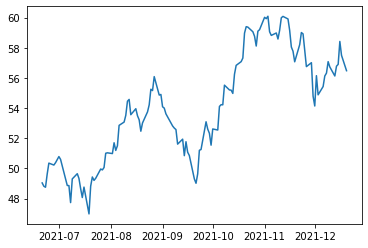

In [14]:
plot.plot(d['Adj Close']['BK'])

Date
2021-06-21    49.039982
2021-06-22    48.822723
2021-06-23    48.753601
2021-06-24    49.622616
2021-06-25    50.353378
                ...    
2021-12-14    56.779999
2021-12-15    56.900002
2021-12-16    58.419998
2021-12-17    57.500000
2021-12-20    56.480000
Name: BK, Length: 128, dtype: float64


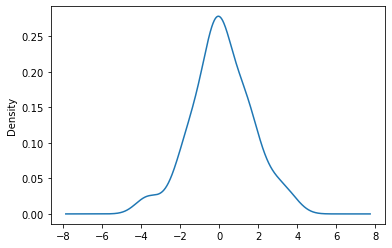

count    127.000000
mean       0.111221
std        1.533640
min       -3.971895
25%       -0.659487
50%        0.058467
75%        1.196435
max        3.834714
Name: BK, dtype: float64

In [15]:
print(d['Adj Close']['BK'])
log_return = np.log(d['Adj Close']['BK']).diff(periods=1)*100
#plot.plot(log_return)
log_return.plot(kind='kde')
plot.show()
log_return.describe()

In [23]:
def var0(x):
    n = len(x)
    return(np.var(x)*(n-1)/n)

def rank_stat(x,c,s):
    R = x.rank()-1
    n = len(x)
    s_select=[]
    for i in range(len(s)):
        s_select.append(s[int(R[i])])
    
    T = sum(c*s_select)
    muT = n*np.mean(c)*np.mean(s)
    varT = n**2/(n-1)*var0(c)*var0(s)
    t = (T-muT)/np.sqrt(varT)
    return('mu T: %f' % muT,'var T: %f' %varT,'T: %f' %T,'t', t)
    

In [24]:
from scipy.stats import norm
def trend_stat(data, alpha=0.05):
    n = len(data)
    c = np.arange(1, n+1, 1)
    s = (np.arange(1, n+1, 1))/(n+1)
    t = rank_stat(data,c,s)[4]
    pI = 1-norm.cdf(t)
    pD = norm.cdf(t)

    trend=[]
    if (pI<alpha):
        trend.append('Increasing Trend')
    elif (pD<alpha):
        trend.append('Decreasing Trend')
    else:
        trend.append('No Trend')
    return(trend)


In [25]:
Bank = ['AMRB','BAC','BK','BMO','BNS','BOCH','BXS','CBAN','CM','COLB','DB','FRC','FVCB','HDB','INDB'
        ,'LYG','MTB','NCBS','OZK','RY','SBNY','TD','UCBI','ALTA','BCBP','BCS','BSAC','BSBR','C'
        ,'CFG','CIT','CMA','CS','EBSB','EGBN','FCCY','FFWM','FHN','FITB','HBMD','HTH','HTLF','HSBC'
        ,'ICBK','JPM','KEY','LBAI','MNSB','NWG','PEBO','PNC','RBNC','RF','SAN','SIVB'
        ,'SSB','STL','TCBI','TFC','UBS','USB','WBS','WFC','ZION']
     
Insurance = ['AJG','AON','MMC','WLTW','AIG','BRK-A','AFL','LNC','MET','MFC','PRU','ALL','AXS','CB',
            'CINF','HMN','LMND','NMIH','PGR','STFC','TRV','WRB','AIZ','FAF','JRVR']

Software = ['ADSK','APPS','AYX','BIGC','CALX','CDNS','CHKP','COIN','COMP','CRM','CTXS','CVLT','DCT','DIDI','DOCU','DT','FICO'
    ,'FSLY','INTU','LSPD','LYFT','MDLA','MSTR','NOW','PAYC','PTC','PUBM','QADA','RIOT','RPD','SAP','SEAC','SHOP',
    'SHSP','SSNC','STMP','TEAM','TTD','UBER','WK','WORK','XELA','XM','YMM','ZI','ADBE','AKAM','APPN','BB','BOX','CRWD',
    'FEYE','FFIV','FIVN','FOUR','GDDY','GSKY','MIME','MSFT','NET','NLOK','OKTA','ORCL','PANW','PATH','PING','PLTR'
    ,'RDWR','S','SPLK','SQ','SWI','TENB','VRSN','ZS']
      
PACKAGED_SOFTWARE = ['MSFT', 'ADBE', 'CRM', 'ORCL', 'INTU', 'SHOP', 'SAP', 'SNOW', 'TEAM', 'UBER', 'ADSK', 'NTES', 'RBLX', 'SNNPS', 'ZM'
            , 'DDOG', 'COIN', 'CDNNS', 'ROP', 'CRWD', 'TWLO', 'ZS', 'U', 'VEEV', 'PLTR', 'MDB', 'ANSS', 'OKTA', 'DOCU', 'APP'
            , 'BILL', 'DIDI', 'PAYC', 'PATH', 'CFLT', 'XM', 'RNG', 'NUAN', 'DT', 'BILI', 'HCP', 'CDAY', 'HOOD', 'NLOK', 'LYFT'
            , 'PTC', 'ASAN', 'S', 'BSY', 'MNDY', 'IOT', 'PCTY', 'OTEX', 'GTLB', 'BKI', 'AUR', 'COUP', 'INFA', 'FICO', 'CTXS'
            , 'AVLR', 'ESTC', 'MCFE']

Semiconductor = ['AMAT', 'AMD', 'ASML', 'AVGO', 'COHU', 'CRUS', 'DQ', 'ENTG', 'INTC',
       'LRCX', 'LSCC', 'MCHP', 'MPWR', 'MRVL', 'MU', 'MXIM', 'NVDA', 'NXPI',
       'ON', 'QCOM', 'QRVO', 'SGH', 'SMTC', 'STM', 'SWKS', 'TSM', 'TXN', 'UMC',
       'XLNX']

MOTOR_VEHICLES = ['ARVL', 'DPRO', 'ELMS', 'F', 'FSR', 'FUV', 'GM', 'GOEV', 'GP', 'HMC', 'HOG', 'HYZN', 'KNDI', 'LCID', 'LEV', 'LI'
                  , 'NIO', 'NIU', 'NKLA', 'PTRA', 'RACE', 'REVG', 'RIDE', 'RIVN', 'SEV', 'SOLO', 'STLA', 'TM', 'TSLA', 'TSP', 'TTM'
                  , 'VLCN', 'XOS', 'XPEV', 'ZEV']
TELECOMMUNICATIONS_EQUIPMENT = ['AAPL', 'QCOM', 'ERIC', 'NOK', 'GRMN', 'UI', 'CIEN' ,'CALX', 'VSAT', 'IDCC', 'COMM', 'INFN', 'AVYA'
                                , 'POLY', 'HLIT', 'AUDC', 'ADTN', 'CLFD', 'INSG', 'SWIR', 'CMTL', 'GILT', 'DZSI', 'AKTS', 'AVNW', 'CAMP'
                                , 'VOXX', 'CRNT', 'PWFL', 'KVHI', 'AIRG', 'WATT', 'PCTI', 'TESS', 'DGLY', 'VISL', 'WTT', 'OCC', 'BKTI'
                                , 'UTSI', 'APWC', 'CLRO', 'JCS', 'UTME', 'SONM', 'BDR']

PHARMACEUTICALS = ['JNJ', 'PFE', 'LLY', 'NVO', 'ABBV', 'NVS', 'MRK', 'AZN', 'BMY', 'SNY', 'GSK', 'TAK', 'RPRX', 'VTRS', 'RGEN', 'GRFS'
                   , 'BHVN', 'ASND', 'EVO', 'OGN', 'LEGN', 'CVAC', 'HCM', 'CERE', 'APLS', 'KRTX', 'IMAB', 'SWTX', 'OPK', 'EQRX', 'DRNA'
                   , 'NKTR', 'IBRX', 'HRMY', 'TPTX', 'EBS', 'ERAS', 'ADCT', 'QTRX', 'AMRX', 'KROS', 'NRIX', 'CRNX', 'ATAI', 'GHRS', 'CNTA'
                  ,'PROC', 'ARCT', 'RETA', 'ARQT', 'DAWN', 'IGMS', 'ZEAL', 'PRAX', 'RPTX']

REAL_ESTATE_INVESTMENT_TRUSTS = ['AMT', 'PLD', 'CCI', 'EQIX', 'PSA', 'SPG', 'DLR', 'SBAC', 'O', 'WELL', 'AVB', 'ARE', 'EQR', 'EXR', 'WY'
                                 , 'INVH', 'MAA', 'DRE', 'LSI', 'SUI', 'ESS', 'VTR', 'PEAK', 'VICI', 'UDR', 'BXP', 'CPT', 'ELS', 'WPC'
                                 , 'IRM', 'KIM', 'AMH', 'MPW', 'REG', 'HST', 'CUBE', 'LAMR', 'NLY', 'REXR', 'CONE', 'GLPI', 'FRT'
                                 , 'STOR', 'EGP', 'FR', 'COLD', 'AIRC', 'NSA', 'NNN', 'STAG']

INTEGRATED_OIL = ['INDO', 'PVL', 'SNMP', 'PRT', 'AMPY', 'REPX', 'FLMN', 'ESTE', 'TELL', 'CNX', 'YPF', 'VNOM', 'DEN', 'CIVI', 'NFG'
                  , 'HESM', 'CHK', 'APA', 'CTRA', 'CVE', 'IMO', 'EC', 'SU', 'E', 'PBR', 'SNP', 'BP', 'EQNR', 'TTE', 'PTR'
                  , 'CVX', 'XOM']

INTERNET_RETAIL = ['AMZN', 'BABA', 'SE', 'JD', 'PDD', 'MELI', 'CPNG', 'LULU', 'EBAY', 'ETSY', 'CHWY', 'W', 'GLBE', 'OZON', 'VIPS'
                   , 'WOOF', 'RVLV', 'NEGG', 'DDL', 'QRTEA', 'QRTEB', 'ACVA', 'OSTK', 'WISH', 'MYTE', 'GIC', 'FLWS', 'TDUP', 'RERE'
                   , 'BZUN', 'AKA', 'CURV', 'REAL', 'MF', 'BOXD', 'GRPN', 'HNST', 'PRTS', 'RENT', 'DLTH', 'DIBS', 'LVLU', 'LITB'
                   , 'IMBI', 'WTRH', 'BQ', 'IPW', 'WNW', 'TC']

BIOTECHNOLOGY = ['AMGN', 'GILD', 'REGN', 'BNTX', 'ILMN', 'VRTX', 'BIIB', 'BGNE', 'SGEN', 'ALNY', 'TECH', 'DNA', 'BMRN', 'TXG', 'INCY'
                 , 'EXAS', 'NVAX', 'NTLA', 'NBIX', 'SRPT', 'MRTX', 'ARWR', 'BPMC', 'CRSP', 'ZLAB', 'FATE', 'EXEL', 'BBIO', 'BEAM'
                 , 'DNLI', 'RARE', 'HALO', 'ARNA', 'VIR', 'ABCM', 'KOD', 'PACB', 'IONS', 'ARVN', 'ITCI', 'ABCL', 'TWST', 'ACAD', 'ALKS']


NFT = [ 'DLPN', 'TKAT', 'ZKIN', 'CIDM', 'HOFV', 'MAT', 'NET', 'TWTR','FNKO', 'PLBY', 'EBay']

sectors=[Bank, Insurance, Software, PACKAGED_SOFTWARE,Semiconductor, MOTOR_VEHICLES, TELECOMMUNICATIONS_EQUIPMENT, PHARMACEUTICALS
         , REAL_ESTATE_INVESTMENT_TRUSTS,INTEGRATED_OIL, INTERNET_RETAIL, BIOTECHNOLOGY, NFT]

sector_name = ['Bank','Insurance','Software','PACKAGED_SOFTWARE','Semiconductor', 'MOTOR_VEHICLES', 'TELECOMMUNICATIONS_EQUIPMENT', 'PHARMACEUTICALS'
         , 'REAL_ESTATE_INVESTMENT_TRUSTS','INTEGRATED_OIL', 'INTERNET_RETAIL', 'BIOTECHNOLOGY', 'NFT']


sum([len(sectors[i]) for i in range(len(sectors))])

578

In [26]:
#try
import pandas as pd
import numpy as np
import yfinance as yf
def seesee(sectors, period = ['1mo','3mo','6mo'], sector_name=sector_name):
    final_report = []
    for fr in range(len(period)):

        report = pd.DataFrame([[np.nan,np.nan,np.nan]], columns=['Increasing Ratio', 'Decreasing Ratio', 'No Change Ratio'], index = sector_name)

        for s in range(len(sectors)):

            d = yf.download( sectors[s] , interval = "1d", period = period[fr]) 
            drop = []
            close=d['Adj Close']

            for i in range(len(sectors[s])):
                if (np.mean(np.isnan(close.iloc[:,i]))==1.0):
                    drop.append(i)

            close = close.drop(labels=close.columns[drop], axis=1)
            close=close.fillna(method="ffill")
            close=close.fillna(method="bfill")

            Trend = []
            for i in range(close.shape[1]):
                Trend.append(trend_stat(close.iloc[:,i]))

            I=[]
            D=[]
            for i in range(len(Trend)):
                if Trend[i]==['Increasing Trend']:
                    I.append(1)
                if Trend[i]==['Decreasing Trend']:   
                    D.append(1)

            report.iloc[s,:] = [(sum(I)/len(Trend)*100), (sum(D)/len(Trend)*100), ((len(Trend)-sum(D)-sum(I))/len(Trend)*100)]
        report = report.style.set_caption(period[fr]) #####
        final_report.append(report)
    return(final_report)

In [27]:
ff = seesee(sectors, period=['1mo','3mo', '6mo'])

[*********************100%***********************]  64 of 64 completed

11 Failed downloads:
- RBNC: No data found, symbol may be delisted
- ICBK: No data found, symbol may be delisted
- HBMD: No data found, symbol may be delisted
- STL: No data found, symbol may be delisted
- BOCH: No data found, symbol may be delisted
- EBSB: No data found, symbol may be delisted
- BXS: No data found, symbol may be delisted
- FCCY: No data found, symbol may be delisted
- ALTA: No data found, symbol may be delisted
- AMRB: No data found, symbol may be delisted
- CIT: No data found, symbol may be delisted
[*********************100%***********************]  25 of 25 completed

2 Failed downloads:
- STFC: No data found, symbol may be delisted
- WLTW: No data found, symbol may be delisted
[*********************100%***********************]  75 of 75 completed

7 Failed downloads:
- GSKY: No data found for this date range, symbol may be delisted
- SHSP: No data found, symbol may be delisted
- MDLA: No data 

Previous Result

In [30]:
ff[0]

,Increasing Ratio,Decreasing Ratio,No Change Ratio
Bank,83.018868,1.886792,15.094340
Insurance,43.478261,4.347826,52.173913
Software,70.588235,11.764706,17.647059
PACKAGED_SOFTWARE,69.491525,10.169492,20.338983
Semiconductor,77.777778,0.000000,22.222222
MOTOR_VEHICLES,45.714286,11.428571,42.857143
TELECOMMUNICATIONS_EQUIPMENT,62.222222,15.555556,22.222222
PHARMACEUTICALS,46.296296,24.074074,29.629630
REAL_ESTATE_INVESTMENT_TRUSTS,30.612245,20.408163,48.979592
INTEGRATED_OIL,87.500000,3.125000,9.375000


In [7]:
ff[1]

,Increasing Ratio,Decreasing Ratio,No Change Ratio
Bank,40.000000,32.727273,27.272727
Insurance,54.166667,25.000000,20.833333
PACKAGED_SOFTWARE,8.196721,91.803279,0.000000
Semiconductor,3.571429,96.428571,0.000000
MOTOR_VEHICLES,2.857143,94.285714,2.857143
TELECOMMUNICATIONS_EQUIPMENT,6.521739,84.782609,8.695652
PHARMACEUTICALS,12.962963,74.074074,12.962963
REAL_ESTATE_INVESTMENT_TRUSTS,10.000000,84.000000,6.000000
INTEGRATED_OIL,84.375000,3.125000,12.500000
INTERNET_RETAIL,4.081633,91.836735,4.081633


In [8]:
ff[2]

,Increasing Ratio,Decreasing Ratio,No Change Ratio
Bank,63.636364,21.818182,14.545455
Insurance,58.333333,20.833333,20.833333
PACKAGED_SOFTWARE,6.557377,90.163934,3.278689
Semiconductor,32.142857,53.571429,14.285714
MOTOR_VEHICLES,8.571429,82.857143,8.571429
TELECOMMUNICATIONS_EQUIPMENT,21.739130,73.913043,4.347826
PHARMACEUTICALS,20.370370,66.666667,12.962963
REAL_ESTATE_INVESTMENT_TRUSTS,50.000000,40.000000,10.000000
INTEGRATED_OIL,81.250000,12.500000,6.250000
INTERNET_RETAIL,4.081633,95.918367,0.000000


In [9]:
# sectors=[Bank,Insurance,PACKAGED_SOFTWARE,Semiconductor, MOTOR_VEHICLES, TELECOMMUNICATIONS_EQUIPMENT, PHARMACEUTICALS
#          , REAL_ESTATE_INVESTMENT_TRUSTS,INTEGRATED_OIL, INTERNET_RETAIL, BIOTECHNOLOGY, NFT]

sectors=[REAL_ESTATE_INVESTMENT_TRUSTS]

final_financial_summary = []
columns=['Business','profitMargins', 'quickRatio']

for s in range(len(sectors)):
    financial_summary = pd.DataFrame([np.repeat(np.nan,len(columns))], columns=columns)

    name = []
    for i in range(len(sectors[s])):     ###
        #print((i+1), '/', len(sectors[s])) ###
        stock = yf.Ticker(sectors[s][i]) ###
        info = pd.DataFrame([stock.info]).T
        if info.shape[0] <=2:
            pass
        else:
            name.append(sectors[s][i]) ###
            financial = pd.DataFrame([np.repeat(np.nan,len(columns))], columns=columns)

            financial.iloc[0,0] = info.iloc[np.where(info.index == 'longBusinessSummary')[0][0]].values
            financial.iloc[0,1] = info.iloc[np.where(info.index == 'profitMargins')[0][0]].values
            financial.iloc[0,2] = info.iloc[np.where(info.index == 'quickRatio')[0][0]].values
            financial_summary = financial_summary.append(financial)

    financial_summary = financial_summary.iloc[1:,:]
    financial_summary.index = name

    final_financial_summary.append(financial_summary)
    #return(final_financial_summary)

In [10]:
final_financial_summary

[                                               Business  profitMargins  \
 AMT   American Tower Corporation, one of the largest...        0.27442   
 PLD   Prologis, Inc. is the global leader in logisti...        0.56931   
 CCI   Crown Castle owns, operates and leases more th...        0.17287   
 EQIX  Equinix (Nasdaq: EQIX) is the world's digital ...        0.07990   
 PSA   Public Storage, a member of the S&P 500 and FT...        0.55825   
 SPG   Simon is a real estate investment trust engage...        0.43984   
 DLR   Digital Realty supports the world's leading en...        0.38617   
 SBAC  SBA Communications Corporation is a first choi...        0.10292   
 O     Realty Income, The Monthly Dividend Company, i...        0.17268   
 WELL  Welltower Inc. (NYSE:WELL), an S&P 500 company...        0.07088   
 AVB   As of December 31, 2020, the Company owned or ...        0.43596   
 ARE   Alexandria Real Estate Equities, Inc. (NYSE:AR...        0.26864   
 EQR   Equity Residential

In [20]:
info.index[60:]
info.iloc[np.where(info.index == 'forwardEps')[0][0]].values

array([0.71], dtype=object)

In [52]:
ticker = 'PLD'
[final_financial_summary[0].iloc[i,:] for i in range(len(final_financial_summary[0])) if final_financial_summary[0].index[i]==ticker]

[Business         Prologis, Inc. is the global leader in logisti...
 profitMargins                                              0.56931
 quickRatio                                                   0.726
 Name: PLD, dtype: object]

In [410]:

ValueError
IndexError
sectors[2][40]
stock = yf.Ticker(sectors[2][40]) ###
info = pd.DataFrame([stock.info]).T
info

,0
ebitdaMargins,None
profitMargins,None
grossMargins,None
operatingCashflow,None
revenueGrowth,None
...,...
dividendYield,None
bidSize,900
dayHigh,87.99
regularMarketPrice,87.32


In [216]:
d = yf.download( 'DLPN' , interval = "1d", period = '1y') 
drop = []
close=d['Adj Close']

   # if (np.mean(np.isnan(close.iloc[:,i]))==1.0):
    #    drop.append(i)

#close = close.drop(labels=close.columns[drop], axis=1)
close=close.fillna(method="ffill")
close=close.fillna(method="bfill")

close.describe()


[*********************100%***********************]  1 of 1 completed


count    252.000000
mean       9.099405
std        3.016929
min        3.390000
25%        8.045000
50%        9.135000
75%       11.192500
max       19.160000
Name: Adj Close, dtype: float64

In [572]:
print(max([(np.mean(np.log(d.iloc[:,i]).diff())) for i in range(d.shape[1])]))
#np.mean((np.log(d.iloc[:,27]).diff())+1)**252

ret = []
for i in range(d.shape[1]):
    ret.append(((np.mean(np.log(d.iloc[:,i]).diff())+1)**252)/np.var(d.iloc[:,i]))

print(max(ret))
np.var(d.iloc[:,0])
pd.DataFrame(ret)



0.006780403818470639
1.9747278886634478


,0
0,1.694073e-02
1,6.535361e-03
2,4.344178e-04
3,8.544674e-04
4,2.232332e-01
...,...
169,3.611196e-13
170,8.719430e-14
171,5.056456e-13
172,7.257042e-14


,0
count,1.024000e+03
mean,2.700004e+07
std,6.581331e+05
min,2.648260e+07
25%,2.648260e+07
50%,2.648260e+07
75%,2.766850e+07
max,3.026200e+07


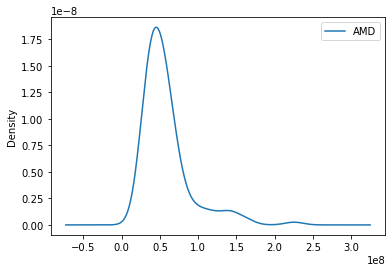

In [479]:
import random
data = d['Volume'].iloc[:,1]
B=2**10
stat=[]
for b in range(B):
    stat.append(min([random.choice(data) for _ in range(len(data))]))
pd.DataFrame(data).plot(kind='kde')
pd.DataFrame(stat).describe()

In [280]:
stock.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-11-25,1.85,1.950,1.85,1.95,2000,0,0
2015-11-27,2.00,2.250,2.00,2.25,2000,0,0
2015-11-30,2.20,2.800,2.20,2.80,7000,0,0
2015-12-01,3.00,3.500,3.00,3.50,8900,0,0
2015-12-02,3.60,3.600,3.60,3.60,1500,0,0
...,...,...,...,...,...,...,...
2021-12-28,4.14,4.180,3.75,3.81,674900,0,0
2021-12-29,3.97,5.486,3.97,5.21,28212100,0,0
2021-12-30,4.80,4.900,4.25,4.31,3850500,0,0


<AxesSubplot:xlabel='Date'>

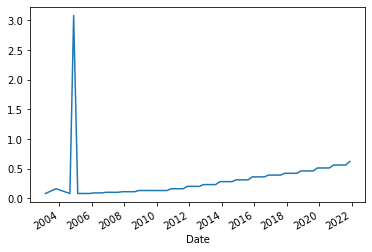

In [20]:
stock.dividends.plot()

In [21]:
stock.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [25]:
stock.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,71.89%,% of Shares Held by Institutions
2,71.94%,% of Float Held by Institutions
3,5395,Number of Institutions Holding Shares


In [26]:
stock.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",613781686,2021-09-29,0.0818,173037332917
1,Blackrock Inc.,507117032,2021-09-29,0.0675,142966433661
2,State Street Corporation,294432926,2021-09-29,0.0392,83006530497
3,"FMR, LLC",215731468,2021-09-29,0.0287,60819015458
4,Price (T.Rowe) Associates Inc,197579453,2021-09-29,0.0263,55701599389
5,"Geode Capital Management, LLC",126079812,2021-09-29,0.0168,35544420599
6,Capital World Investors,110359787,2021-09-29,0.0147,31112631151
7,Capital Research Global Investors,94282634,2021-09-29,0.0126,26580160177
8,Capital International Investors,91901445,2021-09-29,0.0122,25908855374
9,Northern Trust Corporation,89592127,2021-09-29,0.0119,25257812443


In [29]:
stock.calendar

,0,1
Earnings Date,2022-01-24 10:59:00,2022-01-28 12:00:00
Earnings Average,2.31,2.31
Earnings Low,2.27,2.27
Earnings High,2.46,2.46
Revenue Average,50873900000,50873900000
Revenue Low,50536700000,50536700000
Revenue High,51800000000,51800000000


In [39]:
stock.recommendations.iloc[300:,:]

,Firm,To Grade,From Grade,Action
Date,,,,
2021-01-27 11:41:41,Wedbush,Outperform,,main
2021-01-27 13:09:50,Morgan Stanley,Overweight,,main
2021-01-27 13:45:57,Credit Suisse,Outperform,,main
2021-01-27 14:23:23,Raymond James,Strong Buy,,main
2021-01-27 17:21:05,Jefferies,Buy,,main
2021-01-27 17:24:42,Citigroup,Buy,,main
2021-01-27 17:26:26,Mizuho,Buy,,main
2021-01-27 17:29:16,BMO Capital,Outperform,,main
2021-01-27 17:31:51,Barclays,Overweight,,main
